In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt

import sklearn.preprocessing as preprocessing
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('input/titanic/train.csv')
test_data = pd.read_csv('input/titanic/test.csv')

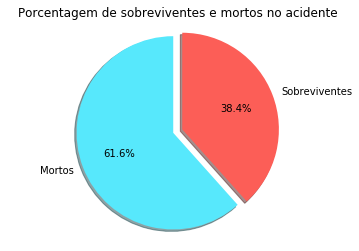

In [3]:
# Taxa de sobreviventes e mortos no desastre
labels = ['Mortos', 'Sobreviventes']
val_counts = titanic_data.Survived.value_counts()

sizes = [val_counts[0], val_counts[1]]
colors = ['#57e8fc', '#fc5e57']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.title('Porcentagem de sobreviventes e mortos no acidente')
plt.show()

In [4]:
# Tratamentos dados ao dataset:
# 1 - Retirada das colunas PassengerId, Cabin, Ticket e Fare
# 2 - Transformar features Sex e Embarked em features numéricas, mantendo a sua categorização
# 3 - Criação de uma feature chamada isAlone, aonde a mesma é uma feature extraída das colunas SibSp and Parch
# 4 - Completar os valores faltantes em Age e Fare com a média

In [5]:
full_data = [titanic_data, test_data]

for dataset in full_data:
    # 1
    dataset.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1, inplace = True)
    # 2
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'].fillna(titanic_data['Embarked'].dropna().mode()[0], inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 3
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
    # 4
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [6]:
y_values = titanic_data['Survived'].values
titanic_data.drop(['Survived'], axis=1, inplace=True)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(titanic_data, y_values, test_size=0.2, stratify=y_values, random_state=32)

In [8]:
x_train.head()


,Pclass,Sex,Age,Fare,Embarked,IsAlone
627,1,1,21.0,77.9583,0,1
459,3,0,28.0,7.7500,2,1
270,1,0,28.0,31.0000,0,1
715,3,0,19.0,7.6500,0,1
779,1,1,43.0,211.3375,0,0


In [26]:
# Considerando os sets de treino e teste criados anteriormente (x_train, x_test, y_train, y_test),
# escolha e treine 3 dos modelos apresentados na aula, cujos nomes estão na lista names.
# 1 - Regressão Logística
# 2 - SVM
# 3 - KNN
# 4 - Rede Neural Multi-Camada (MLP)
# 5 - Árvores de Decisão
# 6 - Random Forest
# Lembrando que é necessário que algums parâmetros sejam tratados na hora da escolha do modelo, então
# não se esqueçam de checar a documentação do scikit-learn.

models = dict()
names = ['Regressão Logística', 'SVM', 'KNN','Rede neural', 'Árvores de Decisão', 'Random Forest']


In [82]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



models['SVM'] = svm.SVC(gamma='scale')
models['Árvores de Decisão'] = tree.DecisionTreeClassifier()
models['Random Forest']  = RandomForestClassifier(n_estimators=100, max_depth=2)
models['Regressão Logística'] = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
models['KNN'] = KNeighborsClassifier(n_neighbors=5)

for nome,modelo in models.items():
    modelo.fit(x_train,y_train)
    predict_treino = modelo.predict(x_train)
    print("Acuracia de treino: ",nome, modelo.score(x_train,y_train))      

Acuracia de treino:  KNN 0.8019662921348315
Acuracia de treino:  Árvores de Decisão 0.9803370786516854
Acuracia de treino:  Random Forest 0.800561797752809
Acuracia de treino:  Regressão Logística 0.8132022471910112
Acuracia de treino:  SVM 0.7317415730337079


In [11]:
# Considerando os modelos treinados no exercício anterior, re-treine os modelos utilizando o método de 
# validação cruzada (cross_validation no pacote scikit-learn), e compare a acurácia de ambas as situações
# (sem a utilização de validação cruzada e com a utilização de validação cruzada).
#
# Além disso, deve ser apresentada a métrica de log-loss do modelo, a sua respectiva matriz de confusão
# (confusion_matrix no pacote do scikit-learn) e a apresentação da curva ROC do modelo (dica: utilize o pacote
# scikitplot)

In [84]:
from sklearn.model_selection import cross_val_score

    

for nome,modelo in models.items():
    predict_teste = modelo.predict(x_test)
    print('#################### Modelo usado - ', nome)
    print(metrics.classification_report(y_test, predict_teste, target_names=labels))
    print(metrics.confusion_matrix(y_test, predict_teste))
    print("Acuracia de Teste: ", nome, modelo.score(x_test, y_test))
    scores = cross_val_score(modelo,x_test, y_test, cv=10)
    print(scores.mean()) 
    


#################### Modelo usado -  KNN
               precision    recall  f1-score   support

       Mortos       0.74      0.85      0.79       110
Sobreviventes       0.68      0.52      0.59        69

    micro avg       0.72      0.72      0.72       179
    macro avg       0.71      0.68      0.69       179
 weighted avg       0.72      0.72      0.71       179

[[93 17]
 [33 36]]
Acuracia de Teste:  KNN 0.7206703910614525
0.6598039215686275
#################### Modelo usado -  Árvores de Decisão
               precision    recall  f1-score   support

       Mortos       0.82      0.85      0.84       110
Sobreviventes       0.75      0.70      0.72        69

    micro avg       0.79      0.79      0.79       179
    macro avg       0.78      0.78      0.78       179
 weighted avg       0.79      0.79      0.79       179

[[94 16]
 [21 48]]
Acuracia de Teste:  Árvores de Decisão 0.7932960893854749
0.7379084967320261
#################### Modelo usado -  Random Forest
         

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras.utils import np_utils

y_train_encoded = np_utils.to_categorical(y_train)
y_test_encoded = np_utils.to_categorical(y_test)


model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2,activation='softmax'))

# losses.

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [115]:
model.fit(x_train,y_train_encoded,epochs=1000)

Epoch 1/1000
712/712 [==============================] - 0s 507us/step - loss: 1.0971 - acc: 0.6264
Epoch 2/1000
712/712 [==============================] - 0s 55us/step - loss: 0.8462 - acc: 0.6152
Epoch 3/1000
712/712 [==============================] - 0s 49us/step - loss: 0.6535 - acc: 0.6657
Epoch 4/1000
712/712 [==============================] - 0s 55us/step - loss: 0.6130 - acc: 0.6826
Epoch 5/1000
712/712 [==============================] - 0s 57us/step - loss: 0.6126 - acc: 0.6840
Epoch 6/1000
712/712 [==============================] - 0s 60us/step - loss: 0.6077 - acc: 0.6896
Epoch 7/1000
712/712 [==============================] - 0s 54us/step - loss: 0.6137 - acc: 0.6784
Epoch 8/1000
712/712 [==============================] - 0s 52us/step - loss: 0.6075 - acc: 0.6812
Epoch 9/1000
712/712 [==============================] - 0s 51us/step - loss: 0.6120 - acc: 0.6854
Epoch 10/1000
712/712 [==============================] - 0s 52us/step - loss: 0.6062 - acc: 0.6798
Epoch 11/1000
712/

712/712 [==============================] - 0s 64us/step - loss: 0.5799 - acc: 0.7008
Epoch 84/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5548 - acc: 0.7065
Epoch 85/1000
712/712 [==============================] - 0s 65us/step - loss: 0.5617 - acc: 0.7135
Epoch 86/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5766 - acc: 0.6868
Epoch 87/1000
712/712 [==============================] - 0s 67us/step - loss: 0.5554 - acc: 0.7051
Epoch 88/1000
712/712 [==============================] - 0s 62us/step - loss: 0.5439 - acc: 0.7121
Epoch 89/1000
712/712 [==============================] - 0s 57us/step - loss: 0.5518 - acc: 0.7177
Epoch 90/1000
712/712 [==============================] - 0s 73us/step - loss: 0.5516 - acc: 0.7107
Epoch 91/1000
712/712 [==============================] - 0s 51us/step - loss: 0.5453 - acc: 0.7177
Epoch 92/1000
712/712 [==============================] - 0s 81us/step - loss: 0.5607 - acc: 0.6882
Epoch 93/1000
712/712 [=

712/712 [==============================] - 0s 48us/step - loss: 0.5237 - acc: 0.7430
Epoch 166/1000
712/712 [==============================] - 0s 55us/step - loss: 0.5177 - acc: 0.7514
Epoch 167/1000
712/712 [==============================] - 0s 61us/step - loss: 0.5216 - acc: 0.7402
Epoch 168/1000
712/712 [==============================] - 0s 63us/step - loss: 0.5069 - acc: 0.7542
Epoch 169/1000
712/712 [==============================] - 0s 52us/step - loss: 0.5359 - acc: 0.7388
Epoch 170/1000
712/712 [==============================] - 0s 55us/step - loss: 0.5439 - acc: 0.7247
Epoch 171/1000
712/712 [==============================] - 0s 51us/step - loss: 0.5242 - acc: 0.7514
Epoch 172/1000
712/712 [==============================] - 0s 51us/step - loss: 0.5346 - acc: 0.7205
Epoch 173/1000
712/712 [==============================] - 0s 64us/step - loss: 0.5553 - acc: 0.7107
Epoch 174/1000
712/712 [==============================] - 0s 51us/step - loss: 0.5346 - acc: 0.7247
Epoch 175/1000


712/712 [==============================] - 0s 41us/step - loss: 0.5105 - acc: 0.7458
Epoch 247/1000
712/712 [==============================] - 0s 51us/step - loss: 0.5098 - acc: 0.7402
Epoch 248/1000
712/712 [==============================] - 0s 52us/step - loss: 0.4971 - acc: 0.7570
Epoch 249/1000
712/712 [==============================] - 0s 50us/step - loss: 0.5047 - acc: 0.7654
Epoch 250/1000
712/712 [==============================] - 0s 59us/step - loss: 0.4974 - acc: 0.7514
Epoch 251/1000
712/712 [==============================] - 0s 63us/step - loss: 0.5212 - acc: 0.7514
Epoch 252/1000
712/712 [==============================] - 0s 50us/step - loss: 0.5133 - acc: 0.7584
Epoch 253/1000
712/712 [==============================] - 0s 58us/step - loss: 0.5209 - acc: 0.7458
Epoch 254/1000
712/712 [==============================] - 0s 42us/step - loss: 0.5142 - acc: 0.7570
Epoch 255/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4932 - acc: 0.7669
Epoch 256/1000


712/712 [==============================] - 0s 49us/step - loss: 0.4925 - acc: 0.7697
Epoch 329/1000
712/712 [==============================] - 0s 44us/step - loss: 0.5038 - acc: 0.7584
Epoch 330/1000
712/712 [==============================] - 0s 56us/step - loss: 0.4868 - acc: 0.7640
Epoch 331/1000
712/712 [==============================] - 0s 56us/step - loss: 0.4865 - acc: 0.7851
Epoch 332/1000
712/712 [==============================] - 0s 62us/step - loss: 0.4843 - acc: 0.7626
Epoch 333/1000
712/712 [==============================] - ETA: 0s - loss: 1.2276 - acc: 0.531 - 0s 57us/step - loss: 0.5186 - acc: 0.7669
Epoch 334/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4927 - acc: 0.7711
Epoch 335/1000
712/712 [==============================] - 0s 53us/step - loss: 0.4893 - acc: 0.7837
Epoch 336/1000
712/712 [==============================] - 0s 62us/step - loss: 0.4863 - acc: 0.7809
Epoch 337/1000
712/712 [==============================] - 0s 65us/step - loss

712/712 [==============================] - 0s 54us/step - loss: 0.4850 - acc: 0.7795
Epoch 410/1000
712/712 [==============================] - 0s 42us/step - loss: 0.4937 - acc: 0.7725
Epoch 411/1000
712/712 [==============================] - 0s 59us/step - loss: 0.4934 - acc: 0.7865
Epoch 412/1000
712/712 [==============================] - 0s 56us/step - loss: 0.4815 - acc: 0.7907
Epoch 413/1000
712/712 [==============================] - 0s 64us/step - loss: 0.4690 - acc: 0.7907
Epoch 414/1000
712/712 [==============================] - 0s 61us/step - loss: 0.5001 - acc: 0.7725
Epoch 415/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4665 - acc: 0.7879
Epoch 416/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4573 - acc: 0.8146
Epoch 417/1000
712/712 [==============================] - 0s 52us/step - loss: 0.4479 - acc: 0.8160
Epoch 418/1000
712/712 [==============================] - 0s 50us/step - loss: 0.4703 - acc: 0.8034
Epoch 419/1000


712/712 [==============================] - 0s 50us/step - loss: 0.4588 - acc: 0.8034
Epoch 491/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4513 - acc: 0.8020
Epoch 492/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4587 - acc: 0.8062
Epoch 493/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4663 - acc: 0.8062
Epoch 494/1000
712/712 [==============================] - 0s 59us/step - loss: 0.4726 - acc: 0.7949
Epoch 495/1000
712/712 [==============================] - 0s 55us/step - loss: 0.5059 - acc: 0.7767
Epoch 496/1000
712/712 [==============================] - 0s 58us/step - loss: 0.4611 - acc: 0.7935
Epoch 497/1000
712/712 [==============================] - 0s 58us/step - loss: 0.4405 - acc: 0.8146
Epoch 498/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4864 - acc: 0.7837
Epoch 499/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4442 - acc: 0.8132
Epoch 500/1000


712/712 [==============================] - 0s 62us/step - loss: 0.4443 - acc: 0.8090
Epoch 573/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4638 - acc: 0.7837
Epoch 574/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4552 - acc: 0.8034
Epoch 575/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4702 - acc: 0.7893
Epoch 576/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4416 - acc: 0.8132
Epoch 577/1000
712/712 [==============================] - 0s 56us/step - loss: 0.4537 - acc: 0.8062
Epoch 578/1000
712/712 [==============================] - ETA: 0s - loss: 0.6137 - acc: 0.781 - 0s 53us/step - loss: 0.4512 - acc: 0.8118
Epoch 579/1000
712/712 [==============================] - 0s 49us/step - loss: 0.4512 - acc: 0.8006
Epoch 580/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4363 - acc: 0.8146
Epoch 581/1000
712/712 [==============================] - 0s 50us/step - loss

712/712 [==============================] - 0s 43us/step - loss: 0.4355 - acc: 0.8062
Epoch 654/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4471 - acc: 0.8132
Epoch 655/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4502 - acc: 0.7963
Epoch 656/1000
712/712 [==============================] - 0s 67us/step - loss: 0.4784 - acc: 0.7767
Epoch 657/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4409 - acc: 0.7963
Epoch 658/1000
712/712 [==============================] - 0s 55us/step - loss: 0.4623 - acc: 0.8020
Epoch 659/1000
712/712 [==============================] - 0s 56us/step - loss: 0.4402 - acc: 0.7963
Epoch 660/1000
712/712 [==============================] - 0s 59us/step - loss: 0.4574 - acc: 0.7992
Epoch 661/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4374 - acc: 0.8034
Epoch 662/1000
712/712 [==============================] - 0s 49us/step - loss: 0.4854 - acc: 0.7978
Epoch 663/1000


712/712 [==============================] - 0s 45us/step - loss: 0.4354 - acc: 0.8020
Epoch 736/1000
712/712 [==============================] - 0s 47us/step - loss: 0.4407 - acc: 0.8132
Epoch 737/1000
712/712 [==============================] - 0s 55us/step - loss: 0.4464 - acc: 0.8006
Epoch 738/1000
712/712 [==============================] - 0s 58us/step - loss: 0.4738 - acc: 0.7879
Epoch 739/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4493 - acc: 0.8104
Epoch 740/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4494 - acc: 0.7935
Epoch 741/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4318 - acc: 0.8006
Epoch 742/1000
712/712 [==============================] - 0s 49us/step - loss: 0.4192 - acc: 0.8287
Epoch 743/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4275 - acc: 0.8216
Epoch 744/1000
712/712 [==============================] - 0s 59us/step - loss: 0.4476 - acc: 0.8006
Epoch 745/1000


712/712 [==============================] - 0s 52us/step - loss: 0.4117 - acc: 0.8357
Epoch 818/1000
712/712 [==============================] - 0s 63us/step - loss: 0.4762 - acc: 0.7795
Epoch 819/1000
712/712 [==============================] - 0s 64us/step - loss: 0.4514 - acc: 0.8062
Epoch 820/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4437 - acc: 0.8076
Epoch 821/1000
712/712 [==============================] - 0s 45us/step - loss: 0.4334 - acc: 0.8118
Epoch 822/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4271 - acc: 0.8160
Epoch 823/1000
712/712 [==============================] - 0s 66us/step - loss: 0.4355 - acc: 0.8090
Epoch 824/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4390 - acc: 0.8062
Epoch 825/1000
712/712 [==============================] - 0s 48us/step - loss: 0.4131 - acc: 0.8230
Epoch 826/1000
712/712 [==============================] - 0s 50us/step - loss: 0.4156 - acc: 0.8244
Epoch 827/1000


712/712 [==============================] - 0s 54us/step - loss: 0.4205 - acc: 0.8174
Epoch 900/1000
712/712 [==============================] - 0s 53us/step - loss: 0.4183 - acc: 0.8315
Epoch 901/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4058 - acc: 0.8272
Epoch 902/1000
712/712 [==============================] - 0s 67us/step - loss: 0.4200 - acc: 0.8272
Epoch 903/1000
712/712 [==============================] - 0s 55us/step - loss: 0.4740 - acc: 0.7907
Epoch 904/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4560 - acc: 0.8118
Epoch 905/1000
712/712 [==============================] - 0s 58us/step - loss: 0.4332 - acc: 0.8076
Epoch 906/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4295 - acc: 0.8076
Epoch 907/1000
712/712 [==============================] - 0s 60us/step - loss: 0.4083 - acc: 0.8258
Epoch 908/1000
712/712 [==============================] - 0s 54us/step - loss: 0.4306 - acc: 0.8048
Epoch 909/1000


712/712 [==============================] - 0s 48us/step - loss: 0.4253 - acc: 0.8230
Epoch 982/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4231 - acc: 0.8244
Epoch 983/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4158 - acc: 0.8202
Epoch 984/1000
712/712 [==============================] - 0s 50us/step - loss: 0.4533 - acc: 0.7893
Epoch 985/1000
712/712 [==============================] - 0s 57us/step - loss: 0.4241 - acc: 0.8216
Epoch 986/1000
712/712 [==============================] - 0s 67us/step - loss: 0.4091 - acc: 0.8118
Epoch 987/1000
712/712 [==============================] - 0s 51us/step - loss: 0.4182 - acc: 0.8258
Epoch 988/1000
712/712 [==============================] - 0s 50us/step - loss: 0.4318 - acc: 0.8048
Epoch 989/1000
712/712 [==============================] - 0s 66us/step - loss: 0.4030 - acc: 0.8315
Epoch 990/1000
712/712 [==============================] - 0s 53us/step - loss: 0.4247 - acc: 0.8272
Epoch 991/1000


In [117]:
model.evaluate(x_test,y_test_encoded)
# print(y_test[:5])
# model.predict_classes(x_test[:5])


179/179 [==============================] - 0s 44us/step


[0.5167903061019642, 0.7765363111842278]